In [1]:
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np

Before the following code lines
Keep the images folder named "Dog" and "Cat" into "images" folder.
images->Dog // All image about dog should keep in this folder
images->Cat // All image about cat should keep in this folder

In [2]:
DATADIR = "images"
CATEGORIES = ["Dog", "Cat"]
IMG_SIZE = 50

Use break for showing the first image and it's pixel value

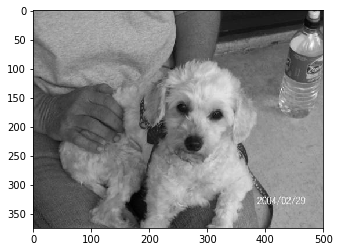

[[145 148 147 ...  38  37  36]
 [149 152 150 ...  38  37  36]
 [153 155 152 ...  38  37  36]
 ...
 [ 58  58  56 ... 160 160 160]
 [ 61  62  59 ... 161 162 162]
 [ 59  62  62 ... 161 161 162]]


In [3]:

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # paths to drives from different category
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

print(img_array)

For resizing the image              hight     width

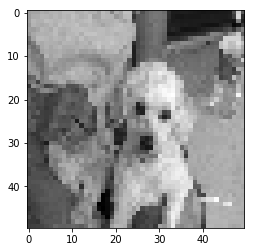

In [4]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

Training Data

In [5]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass

In [6]:
create_training_data()
print(len(training_data))

import random
random.shuffle(training_data)

24946


In [7]:
X = []  # Feature vector
y = []  # Lables

for feature, label in training_data:
    X.append(feature)
    y.append(label)

In [8]:
# Convert to numpy array
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [9]:
# Make pickle dump
import pickle
# Features are going to be dump called 'X.pickle'
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

# Labels are going to be dump called 'y.pickle'
pickle_out = open("y.pickle","wb")
pickle.dump(y,pickle_out)
pickle_out.close()

# For loading dump and printing the values for first 10 columns
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
#print(X[:10])

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
#print(y[:10])